# Sales Analysis

### We have been given sales data from electronics sector for 12 months and we are going to answer some questions to better understand the business in this sector.

### Import necessary libraries

In [1]:
import glob
import pandas as pd

### Combine multiple csv files into one DataFrame

In [2]:
files = glob.glob('*.csv')
data = pd.DataFrame()
for file in files:
    current = pd.read_csv(file)
    data = pd.concat([data, current], axis=0)
print('Number of rows in the combined csv file:', data.shape[0])

('Number of rows in the combined csv file:', 186850)


### Read the master DataFrame

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

The first step in this is figuring out what we need to clean. I have found in practice that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data. We would like to have a new column for month to compare sales in different months. We use the following line to convert the string type dates to the form that is understandable by Python. 

data['Order Date'] = pd.to_datetime(data['Order Date'])

Note that this does not work because we have words and spaces in the column Order Date. In the first step, we identify all missing data

In [4]:
nan_data = data.loc[data.isna().any(axis=1)]
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


We now remove all rows which contain NaN values

In [5]:
data.dropna(how='all', inplace=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Now, there is no NaN entry in the master DataFrame. Dimensions of the DataFrame is given below

In [6]:
data.shape

(186305, 6)

Number of rows deleted: 186850 - 186305 = 545 row

In [7]:
data['Month'] = [int(w[0:2]) for w in data['Order Date']]
data.head()

ValueError: invalid literal for int() with base 10: 'Or'

We understand that something is wrong and there is an 'Or' item that must be removed

In [8]:
data = data.loc[data['Order Date'].str[0:2] != 'Or']
data.shape

(185950, 6)

A lot morerows are deleted now, i.e. 186305 - 185950 = 355 deleted rows. Now we can extract the month from the Order Date column. Here, we propose 3 methods. One could use any of them...

In [9]:
# method 1
# data['Month'] = [int(w[0:2]) for w in data['Order Date']]

# method 2
# data['Month'] = data['Order Date'].str[0:2].astype(int)
# data.head()

# method 3
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Question 1: What was the best month for sales? and how much was earned that month?

In [10]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
data1 = data.groupby('Month')['Sales'].sum(axis=0).reset_index()
data1 = data1.sort_values(by=['Sales'], ascending=False)   # to show like a table
data1

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


In [12]:
import matplotlib.pyplot as plt
x = data1['Month']
y = data1['Sales']
plt.bar(x, y)
plt.xticks(x)
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
data1 = data1.sort_values(by=['Month'])

import calendar
data1['New'] = [calendar.month_abbr[w] for w in data1['Month']]
data1

,Month,Sales,New
0,1,1822256.73,Jan
1,2,2202022.42,Feb
2,3,2807100.38,Mar
3,4,3390670.24,Apr
4,5,3152606.75,May
5,6,2577802.26,Jun
6,7,2647775.76,Jul
7,8,2244467.88,Aug
8,9,2097560.13,Sep
9,10,3736726.88,Oct


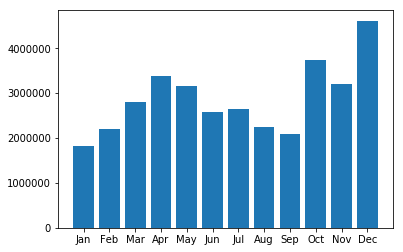

In [14]:
import matplotlib.pyplot as plt
x = data1['New']
y = data1['Sales']
plt.bar(x, y)
plt.xticks(x)
plt.show()

### Question 2: What city had the highest amount of Sales? 

In [15]:
data['City'] = [w.split(',')[1].lstrip() + ' ' + '(' + w.split(',')[2][1:3] + ')' for w in data['Purchase Address']]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
data2 = data.groupby('City')['Sales'].sum(axis=0).reset_index()
data2 = data2.sort_values(by=['Sales'], ascending=False)
data2

,City,Sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
2,Boston (MA),3661642.01
0,Atlanta (GA),2795498.58
3,Dallas (TX),2767975.40
9,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
1,Austin (TX),1819581.75
6,Portland (ME),449758.27


We sorted the data above because we wanted to see the order in a DataFrame that looks like a table

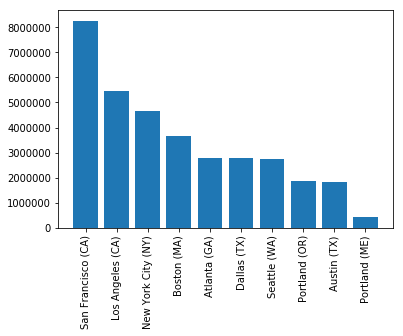

In [17]:
x = data2['City']
y = data2['Sales']
plt.bar(x, y)
plt.xticks(x, rotation = 'vertical')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
data['Hour'] = data['Order Date'].dt.hour
data3 = data.groupby('Hour')['Sales'].count().reset_index()
data3

,Hour,Sales
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


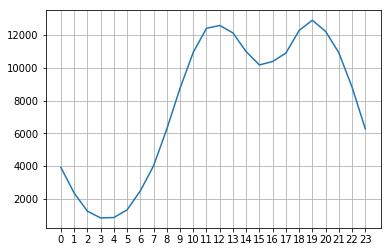

In [19]:
x = data3['Hour']
y = data3['Sales']
plt.plot(x, y)
plt.grid()
plt.xticks(x)
plt.show()

### Question 4: What products are most often sold together?

In [47]:
data4 = data.groupby('Order ID')['Product'].agg(lambda x: ','.join(x)).reset_index()
data4.head()

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


In [48]:
data4.loc[data4['Order ID'] == '176560']

,Order ID,Product
35326,176560,"Google Phone,Wired Headphones"


In [49]:
from itertools import combinations
from collections import Counter

dict = Counter()

for row in data4['Product']:
    row = row.split(',')
    dict.update(Counter(combinations(row, 2)))

# dict2 = sorted(dict.items(), key=lambda x: x[1], reverse=True)
# dict2[:10]

for key,value in dict.most_common(10):
    print(key, value)

(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


### Question 5: What products sold the most?

In [50]:
data5 = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
data5

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


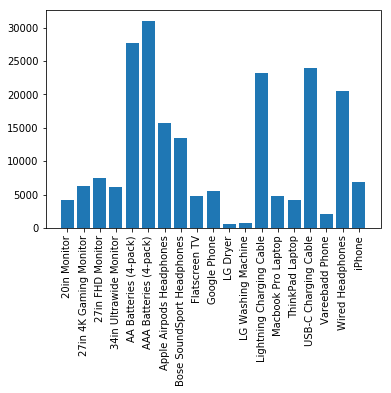

In [51]:
x = data5['Product']
y = data5['Quantity Ordered']
plt.bar(x, y)
plt.xticks(x, rotation = 'vertical')
plt.show()

### Overlay the price of each product

In [52]:
data6 = data.groupby('Product')['Price Each'].mean().reset_index()
data6

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\Home\Anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


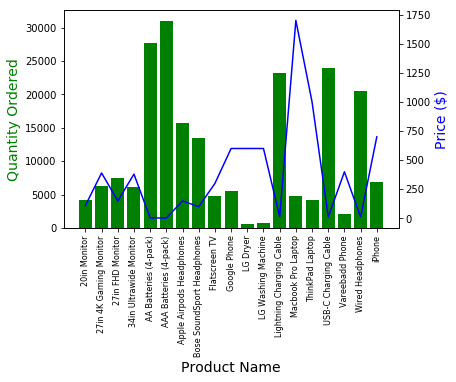

In [53]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='g')
ax2.plot(x, data6['Price Each'], color='b')

ax1.set_xlabel('Product Name', size=14)
ax1.set_ylabel('Quantity Ordered', color='g', size=14)
ax2.set_ylabel('Price ($)', color='b', size=14)
ax1.set_xticklabels(x, rotation='vertical', size=8)

fig.show()